In [31]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import collections

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.set_printoptions(edgeitems=2)
torch.manual_seed(123)

In [ ]:
class_names = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

In [33]:
from torchvision import datasets, transforms

data_path = "../data-unversioned/p1ch6/"
cifar10 = datasets.CIFAR10(
    data_path,
    train=True,
    download=True,
    transform=transforms.Compose(
        [
            transforms.ToTensor(),
            transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616)),
        ]
    ),
)

Files already downloaded and verified


In [34]:
cifar10_val = datasets.CIFAR10(
    data_path,
    train=False,
    download=True,
    transform=transforms.Compose(
        [
            transforms.ToTensor(),
            transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616)),
        ]
    ),
)

Files already downloaded and verified


In [ ]:
label_map = {0: 0, 2: 1}
class_names = ["airplane", "bird"]
cifar2 = [(img, label_map[label]) for img, label in cifar10 if label in [0, 2]]
cifar2_val = [(img, label_map[label]) for img, label in cifar10_val if label in [0, 2]]

In [ ]:
connected_model = nn.Sequential(
    nn.Linear(3072, 1024),
    nn.Tanh(),
    nn.Linear(1024, 512),
    nn.Tanh(),
    nn.Linear(512, 128),
    nn.Tanh(),
    nn.Linear(128, 2),
)

In [37]:
numel_list = [
    p.numel() for p in connected_model.parameters() if p.requires_grad == True
]
sum(numel_list), numel_list

(3737474, [3145728, 1024, 524288, 512, 65536, 128, 256, 2])

In [ ]:
first_model = nn.Sequential(
    nn.Linear(3072, 512), nn.Tanh(), nn.Linear(512, 2), nn.LogSoftmax(dim=1)
)

In [39]:
numel_list = [p.numel() for p in first_model.parameters()]
sum(numel_list), numel_list

(1574402, [1572864, 512, 1024, 2])

In [40]:
linear = nn.Linear(3072, 1024)

linear.weight.shape, linear.bias.shape

(torch.Size([1024, 3072]), torch.Size([1024]))

In [41]:
conv = nn.Conv2d(3, 16, kernel_size=3)  # <1>
conv

Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))

In [42]:
conv.weight.shape, conv.bias.shape

(torch.Size([16, 3, 3, 3]), torch.Size([16]))

In [43]:
img, _ = cifar2[0]
output = conv(img.unsqueeze(0))
img.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 16, 30, 30]))

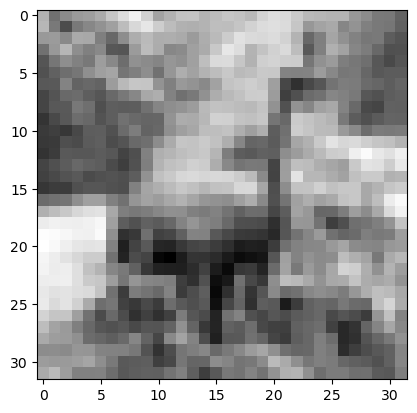

In [44]:
plt.imshow(img.mean(0), cmap="gray")
plt.show()

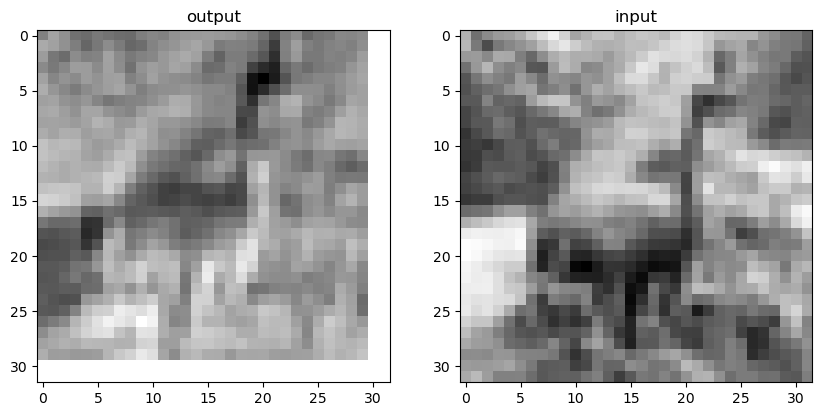

In [45]:
plt.figure(figsize=(10, 4.8))  # bookskip
ax1 = plt.subplot(1, 2, 1)  # bookskip
plt.title("output")  # bookskip
plt.imshow(output[0, 0].detach(), cmap="gray")
plt.subplot(1, 2, 2, sharex=ax1, sharey=ax1)  # bookskip
plt.imshow(img.mean(0), cmap="gray")  # bookskip
plt.title("input")  # bookskip
plt.savefig("Ch8_F2_PyTorch.png")  # bookskip
plt.show()

In [46]:
conv = nn.Conv2d(3, 1, kernel_size=3, padding=1)  # <1>
output = conv(img.unsqueeze(0))
img.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 1, 32, 32]))

In [ ]:
with torch.no_grad():
    conv.bias.zero_()

with torch.no_grad():
    conv.weight.fill_(1.0 / 9.0)

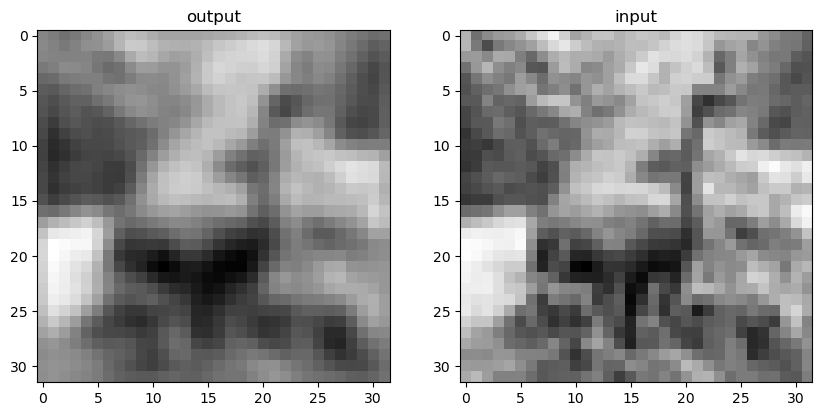

In [48]:
output = conv(img.unsqueeze(0))
plt.figure(figsize=(10, 4.8))  # bookskip
ax1 = plt.subplot(1, 2, 1)  # bookskip
plt.title("output")  # bookskip
plt.imshow(output[0, 0].detach(), cmap="gray")
plt.subplot(1, 2, 2, sharex=ax1, sharey=ax1)  # bookskip
plt.imshow(img.mean(0), cmap="gray")  # bookskip
plt.title("input")  # bookskip
plt.savefig("Ch8_F4_PyTorch.png")  # bookskip
plt.show()

In [ ]:
conv = nn.Conv2d(3, 1, kernel_size=3, padding=1)

with torch.no_grad():
    conv.weight[:] = torch.tensor(
        [[-1.0, 0.0, 1.0], [-1.0, 0.0, 1.0], [-1.0, 0.0, 1.0]]
    )
    conv.bias.zero_()

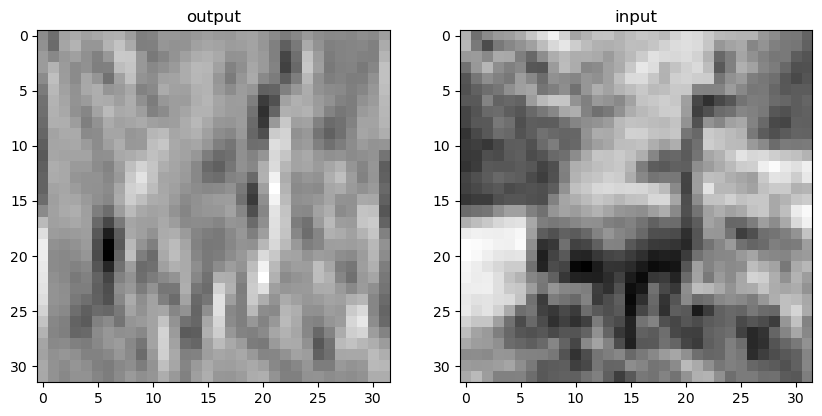

In [50]:
output = conv(img.unsqueeze(0))
plt.figure(figsize=(10, 4.8))  # bookskip
ax1 = plt.subplot(1, 2, 1)  # bookskip
plt.title("output")  # bookskip
plt.imshow(output[0, 0].detach(), cmap="gray")
plt.subplot(1, 2, 2, sharex=ax1, sharey=ax1)  # bookskip
plt.imshow(img.mean(0), cmap="gray")  # bookskip
plt.title("input")  # bookskip
plt.savefig("Ch8_F5_PyTorch.png")  # bookskip
plt.show()

In [51]:
pool = nn.MaxPool2d(2)
output = pool(img.unsqueeze(0))

img.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 3, 16, 16]))

In [ ]:
model = nn.Sequential(
    nn.Conv2d(3, 16, kernel_size=3, padding=1),
    nn.Tanh(),
    nn.MaxPool2d(2),
    nn.Conv2d(16, 8, kernel_size=3, padding=1),
    nn.Tanh(),
    nn.MaxPool2d(2),
    # ...
)

In [ ]:
model = nn.Sequential(
    nn.Conv2d(3, 16, kernel_size=3, padding=1),
    nn.Tanh(),
    nn.MaxPool2d(2),
    nn.Conv2d(16, 8, kernel_size=3, padding=1),
    nn.Tanh(),
    nn.MaxPool2d(2),
    # ... <1>
    nn.Linear(8 * 8 * 8, 32),
    nn.Tanh(),
    nn.Linear(32, 2),
)

In [54]:
numel_list = [p.numel() for p in model.parameters()]
sum(numel_list), numel_list

(18090, [432, 16, 1152, 8, 16384, 32, 64, 2])

# Subclassing nn.Module for More Flexibility

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.act1 = nn.Tanh()
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.act2 = nn.Tanh()
        self.pool2 = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.act3 = nn.Tanh()
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = self.pool1(self.act1(self.conv1(x)))
        out = self.pool2(self.act2(self.conv2(out)))
        out = out.view(-1, 8 * 8 * 8)  # <1>
        out = self.act3(self.fc1(out))
        out = self.fc2(out)
        return out

In [57]:
model = Net()

numel_list = [p.numel() for p in model.parameters()]
sum(numel_list), numel_list

(18090, [432, 16, 1152, 8, 16384, 32, 64, 2])

# Using the Functional API

In [ ]:
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = out.view(-1, 8 * 8 * 8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

In [59]:
model = Net()
model(img.unsqueeze(0))

tensor([[-0.0157,  0.1143]], grad_fn=<AddmmBackward0>)

In [ ]:
import datetime  # <1>


def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
    for epoch in range(1, n_epochs + 1):  # <2>
        loss_train = 0.0
        for imgs, labels in train_loader:  # <3>
            outputs = model(imgs)  # <4>
            loss = loss_fn(outputs, labels)  # <5>
            optimizer.zero_grad()  # <6>
            loss.backward()  # <7>
            optimizer.step()  # <8>
            loss_train += loss.item()  # <9>

        if epoch == 1 or epoch % 10 == 0:
            print(
                "{} Epoch {}, Training loss {}".format(
                    datetime.datetime.now(), epoch, loss_train / len(train_loader)
                )
            )  # <10>

In [61]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)  # <1>

model = Net()  #  <2>
optimizer = optim.SGD(model.parameters(), lr=1e-2)  #  <3>
loss_fn = nn.CrossEntropyLoss()  #  <4>

training_loop(  # <5>
    n_epochs=100,
    optimizer=optimizer,
    model=model,
    loss_fn=loss_fn,
    train_loader=train_loader,
)

2025-03-18 15:35:47.021653 Epoch 1, Training loss 0.5640490022814197
2025-03-18 15:36:11.496374 Epoch 10, Training loss 0.3276066405663065
2025-03-18 15:36:36.602322 Epoch 20, Training loss 0.30306829284330844
2025-03-18 15:37:00.022050 Epoch 30, Training loss 0.2809745377510976
2025-03-18 15:37:25.907837 Epoch 40, Training loss 0.2611881802985623
2025-03-18 15:37:50.391394 Epoch 50, Training loss 0.2439960581102189
2025-03-18 15:38:16.896479 Epoch 60, Training loss 0.2248042335935459
2025-03-18 15:38:42.930885 Epoch 70, Training loss 0.205363326201773
2025-03-18 15:39:06.485543 Epoch 80, Training loss 0.1889406277970144
2025-03-18 15:39:28.978981 Epoch 90, Training loss 0.17477051875773508
2025-03-18 15:39:55.422739 Epoch 100, Training loss 0.1616910289095086


In [75]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=False)
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=False)


def validate(model, train_loader, val_loader):
    for name, loader in [("train", train_loader), ("val", val_loader)]:
        correct = 0
        total = 0

        with torch.no_grad():  # <1>
            for imgs, labels in loader:
                outputs = model(imgs)
                _, predicted = torch.max(outputs, dim=1)  # <2>
                total += labels.shape[0]  # <3>
                correct += int((predicted == labels).sum())  # <4>

        print("Accuracy {}: {:.2f}".format(name, correct / total))


validate(model, train_loader, val_loader)

Accuracy train: 0.96
Accuracy val: 0.89


In [76]:
torch.save(model.state_dict(), data_path + "birds_vs_airplanes.pt")

In [77]:
loaded_model = Net()  # <1>
loaded_model.load_state_dict(torch.load(data_path + "birds_vs_airplanes.pt"))

/var/folders/b0/0l4ksqs93r57m4lrp4v92c700000gn/T/ipykernel_27297/2089799618.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(data_

RuntimeError: Error(s) in loading state_dict for Net:
	size mismatch for conv1.weight: copying a param with shape torch.Size([32, 3, 3, 3]) from checkpoint, the shape in current model is torch.Size([16, 3, 3, 3]).
	size mismatch for conv1.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([16]).
	size mismatch for conv2.weight: copying a param with shape torch.Size([16, 32, 3, 3]) from checkpoint, the shape in current model is torch.Size([8, 16, 3, 3]).
	size mismatch for conv2.bias: copying a param with shape torch.Size([16]) from checkpoint, the shape in current model is torch.Size([8]).
	size mismatch for fc1.weight: copying a param with shape torch.Size([32, 1024]) from checkpoint, the shape in current model is torch.Size([32, 512]).

In [78]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f"Training on device {device}.")

Training on device cpu.


# Training the Convolutional Network

In [79]:
import datetime


def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
    for epoch in range(1, n_epochs + 1):
        loss_train = 0.0
        for imgs, labels in train_loader:
            imgs = imgs.to(device=device)  # <1>
            labels = labels.to(device=device)
            outputs = model(imgs)
            loss = loss_fn(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            loss_train += loss.item()

        if epoch == 1 or epoch % 10 == 0:
            print(
                "{} Epoch {}, Training loss {}".format(
                    datetime.datetime.now(), epoch, loss_train / len(train_loader)
                )
            )

In [67]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

model = Net().to(device=device)  # <1>
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs=100,
    optimizer=optimizer,
    model=model,
    loss_fn=loss_fn,
    train_loader=train_loader,
)

2025-03-18 15:39:59.641009 Epoch 1, Training loss 0.5758679744544303
2025-03-18 15:40:23.145648 Epoch 10, Training loss 0.32571514890452097
2025-03-18 15:40:46.335401 Epoch 20, Training loss 0.2901813904191278
2025-03-18 15:41:20.710799 Epoch 30, Training loss 0.2672762456023769
2025-03-18 15:41:50.748844 Epoch 40, Training loss 0.24809321481141317
2025-03-18 15:42:18.582421 Epoch 50, Training loss 0.22969008365254492
2025-03-18 15:42:48.426679 Epoch 60, Training loss 0.21521743472404542
2025-03-18 15:43:15.695965 Epoch 70, Training loss 0.19956059872534623
2025-03-18 15:43:40.685395 Epoch 80, Training loss 0.1853627125453797
2025-03-18 15:44:06.145210 Epoch 90, Training loss 0.16801209496274874
2025-03-18 15:44:34.386017 Epoch 100, Training loss 0.1561770761373696


In [68]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=False)
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=False)
all_acc_dict = collections.OrderedDict()


def validate(model, train_loader, val_loader):
    accdict = {}
    for name, loader in [("train", train_loader), ("val", val_loader)]:
        correct = 0
        total = 0

        with torch.no_grad():
            for imgs, labels in loader:
                imgs = imgs.to(device=device)
                labels = labels.to(device=device)
                outputs = model(imgs)
                _, predicted = torch.max(outputs, dim=1)  # <1>
                total += labels.shape[0]
                correct += int((predicted == labels).sum())

        print("Accuracy {}: {:.2f}".format(name, correct / total))
        accdict[name] = correct / total
    return accdict


all_acc_dict["baseline"] = validate(model, train_loader, val_loader)

Accuracy train: 0.92
Accuracy val: 0.89


In [69]:
loaded_model = Net().to(device=device)
loaded_model.load_state_dict(
    torch.load(data_path + "birds_vs_airplanes.pt", map_location=device)
)

/var/folders/b0/0l4ksqs93r57m4lrp4v92c700000gn/T/ipykernel_27297/517758729.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(data_p

<All keys matched successfully>

In [ ]:
class NetWidth(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 16, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(16 * 8 * 8, 32)
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = out.view(-1, 16 * 8 * 8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

In [72]:
model = NetWidth().to(device=device)
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs=100,
    optimizer=optimizer,
    model=model,
    loss_fn=loss_fn,
    train_loader=train_loader,
)

validate(model, train_loader, val_loader)

2025-03-18 19:55:40.818737 Epoch 1, Training loss 0.5441078205776823
2025-03-18 19:56:15.894618 Epoch 10, Training loss 0.3095963386593351
2025-03-18 19:56:55.135555 Epoch 20, Training loss 0.2710648657410008
2025-03-18 19:57:33.757692 Epoch 30, Training loss 0.24341284179953254
2025-03-18 19:58:13.316903 Epoch 40, Training loss 0.21817122428280533
2025-03-18 19:58:53.571695 Epoch 50, Training loss 0.19423730139899406
2025-03-18 19:59:34.513636 Epoch 60, Training loss 0.1720317151800842
2025-03-18 20:00:15.619317 Epoch 70, Training loss 0.15004176043780745
2025-03-18 20:00:57.052610 Epoch 80, Training loss 0.1282501423814494
2025-03-18 20:01:38.550107 Epoch 90, Training loss 0.10746487702248962
2025-03-18 20:02:26.394745 Epoch 100, Training loss 0.08851301624991331
Accuracy train: 0.96
Accuracy val: 0.89


{'train': 0.9627, 'val': 0.8885}

# Increasing Width

In [ ]:
class NetWidth(nn.Module):
    def __init__(self, n_chans1=32):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(n_chans1, n_chans1 // 2, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(8 * 8 * n_chans1 // 2, 32)
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = out.view(-1, 8 * 8 * self.n_chans1 // 2)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

In [ ]:
model = NetWidth(n_chans1=32).to(device=device)
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs=100,
    optimizer=optimizer,
    model=model,
    loss_fn=loss_fn,
    train_loader=train_loader,
)

all_acc_dict["width"] = validate(model, train_loader, val_loader)

2020-01-16 23:12:22.646242 Epoch 1, Training loss 0.5444508081029176
2020-01-16 23:12:26.841887 Epoch 10, Training loss 0.31707597633076323
2020-01-16 23:12:31.310813 Epoch 20, Training loss 0.27454944429503886
2020-01-16 23:12:35.891615 Epoch 30, Training loss 0.2425653456123012
2020-01-16 23:12:40.420664 Epoch 40, Training loss 0.21338120942852298
2020-01-16 23:12:44.954698 Epoch 50, Training loss 0.18698934290059813
2020-01-16 23:12:49.527939 Epoch 60, Training loss 0.16319987830367816
2020-01-16 23:12:54.380134 Epoch 70, Training loss 0.14089395708529054
2020-01-16 23:12:59.247492 Epoch 80, Training loss 0.11998948957889703
2020-01-16 23:13:04.068846 Epoch 90, Training loss 0.10076516851260783
2020-01-16 23:13:08.913110 Epoch 100, Training loss 0.0832248356217032
Accuracy train: 0.96
Accuracy val: 0.90


In [ ]:
sum(p.numel() for p in model.parameters())

38386

# Training Loop with L2 Regularization with weight penalties and dropout

In [ ]:
def training_loop_l2reg(n_epochs, optimizer, model, loss_fn, train_loader):
    for epoch in range(1, n_epochs + 1):
        loss_train = 0.0
        for imgs, labels in train_loader:
            imgs = imgs.to(device=device)
            labels = labels.to(device=device)
            outputs = model(imgs)
            loss = loss_fn(outputs, labels)

            l2_lambda = 0.001
            l2_norm = sum(p.pow(2.0).sum() for p in model.parameters())  # <1>
            loss = loss + l2_lambda * l2_norm

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            loss_train += loss.item()
        if epoch == 1 or epoch % 10 == 0:
            print(
                "{} Epoch {}, Training loss {}".format(
                    datetime.datetime.now(), epoch, loss_train / len(train_loader)
                )
            )

In [ ]:
model = Net().to(device=device)
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop_l2reg(
    n_epochs=100,
    optimizer=optimizer,
    model=model,
    loss_fn=loss_fn,
    train_loader=train_loader,
)
all_acc_dict["l2 reg"] = validate(model, train_loader, val_loader)

2020-01-16 23:13:10.225792 Epoch 1, Training loss 0.584277889151482
2020-01-16 23:13:17.795340 Epoch 10, Training loss 0.36633389723149073
2020-01-16 23:13:26.277897 Epoch 20, Training loss 0.3225795095133933
2020-01-16 23:13:35.341923 Epoch 30, Training loss 0.29615209541123383
2020-01-16 23:13:44.351376 Epoch 40, Training loss 0.2775719240782367
2020-01-16 23:13:53.296178 Epoch 50, Training loss 0.2636590329514947
2020-01-16 23:14:02.220169 Epoch 60, Training loss 0.2515565001755763
2020-01-16 23:14:11.076573 Epoch 70, Training loss 0.24007968713713299
2020-01-16 23:14:20.807501 Epoch 80, Training loss 0.22931366546708307
2020-01-16 23:14:31.504612 Epoch 90, Training loss 0.21898466424577556
2020-01-16 23:14:41.934048 Epoch 100, Training loss 0.20924225397360552
Accuracy train: 0.90
Accuracy val: 0.87


In [ ]:
class NetDropout(nn.Module):
    def __init__(self, n_chans1=32):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=3, padding=1)
        self.conv1_dropout = nn.Dropout2d(p=0.4)
        self.conv2 = nn.Conv2d(n_chans1, n_chans1 // 2, kernel_size=3, padding=1)
        self.conv2_dropout = nn.Dropout2d(p=0.4)
        self.fc1 = nn.Linear(8 * 8 * n_chans1 // 2, 32)
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = self.conv1_dropout(out)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = self.conv2_dropout(out)
        out = out.view(-1, 8 * 8 * self.n_chans1 // 2)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

In [ ]:
model = NetDropout(n_chans1=32).to(device=device)
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs=100,
    optimizer=optimizer,
    model=model,
    loss_fn=loss_fn,
    train_loader=train_loader,
)
all_acc_dict["dropout"] = validate(model, train_loader, val_loader)

2020-01-16 23:14:42.863912 Epoch 1, Training loss 0.5800061457476039
2020-01-16 23:14:47.868802 Epoch 10, Training loss 0.38074702850192976
2020-01-16 23:14:53.145910 Epoch 20, Training loss 0.34908065987620385
2020-01-16 23:14:58.056904 Epoch 30, Training loss 0.32977743029214773
2020-01-16 23:15:03.131635 Epoch 40, Training loss 0.3125769621247699
2020-01-16 23:15:08.321374 Epoch 50, Training loss 0.29207915010725616
2020-01-16 23:15:13.535053 Epoch 60, Training loss 0.28212467301043737
2020-01-16 23:15:18.876606 Epoch 70, Training loss 0.2723999054758412
2020-01-16 23:15:24.114116 Epoch 80, Training loss 0.2627566327714616
2020-01-16 23:15:29.342708 Epoch 90, Training loss 0.2537129214804643
2020-01-16 23:15:34.594518 Epoch 100, Training loss 0.23995957129700168
Accuracy train: 0.89
Accuracy val: 0.88


# Batch Normalization

In [ ]:
class NetBatchNorm(nn.Module):
    def __init__(self, n_chans1=32):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=3, padding=1)
        self.conv1_batchnorm = nn.BatchNorm2d(num_features=n_chans1)
        self.conv2 = nn.Conv2d(n_chans1, n_chans1 // 2, kernel_size=3, padding=1)
        self.conv2_batchnorm = nn.BatchNorm2d(num_features=n_chans1 // 2)
        self.fc1 = nn.Linear(8 * 8 * n_chans1 // 2, 32)
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = self.conv1_batchnorm(self.conv1(x))
        out = F.max_pool2d(torch.tanh(out), 2)
        out = self.conv2_batchnorm(self.conv2(out))
        out = F.max_pool2d(torch.tanh(out), 2)
        out = out.view(-1, 8 * 8 * self.n_chans1 // 2)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

In [ ]:
model = NetBatchNorm(n_chans1=32).to(device=device)
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs=100,
    optimizer=optimizer,
    model=model,
    loss_fn=loss_fn,
    train_loader=train_loader,
)
all_acc_dict["batch_norm"] = validate(model, train_loader, val_loader)

2020-01-16 23:15:35.691938 Epoch 1, Training loss 0.4739942996744897
2020-01-16 23:15:40.475810 Epoch 10, Training loss 0.25983829872243724
2020-01-16 23:15:45.771541 Epoch 20, Training loss 0.19428231121058676
2020-01-16 23:15:51.089952 Epoch 30, Training loss 0.14371838975863852
2020-01-16 23:15:56.515419 Epoch 40, Training loss 0.101108748762376
2020-01-16 23:16:01.824733 Epoch 50, Training loss 0.06699353904955706
2020-01-16 23:16:07.094885 Epoch 60, Training loss 0.041509037291642965
2020-01-16 23:16:12.655136 Epoch 70, Training loss 0.032447671671961525
2020-01-16 23:16:18.188782 Epoch 80, Training loss 0.017081547878492788
2020-01-16 23:16:23.578206 Epoch 90, Training loss 0.011301719506455076
2020-01-16 23:16:28.884481 Epoch 100, Training loss 0.007566932796435371
Accuracy train: 1.00
Accuracy val: 0.89


In [ ]:
class NetDepth(nn.Module):
    def __init__(self, n_chans1=32):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(n_chans1, n_chans1 // 2, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(n_chans1 // 2, n_chans1 // 2, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(4 * 4 * n_chans1 // 2, 32)
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)), 2)
        out = F.max_pool2d(torch.relu(self.conv2(out)), 2)
        out = F.max_pool2d(torch.relu(self.conv3(out)), 2)
        out = out.view(-1, 4 * 4 * self.n_chans1 // 2)
        out = torch.relu(self.fc1(out))
        out = self.fc2(out)
        return out

In [ ]:
model = NetDepth(n_chans1=32).to(device=device)
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs=100,
    optimizer=optimizer,
    model=model,
    loss_fn=loss_fn,
    train_loader=train_loader,
)
all_acc_dict["depth"] = validate(model, train_loader, val_loader)

2020-01-16 23:16:30.447670 Epoch 1, Training loss 0.6548013091087341
2020-01-16 23:16:35.367838 Epoch 10, Training loss 0.34000502014236084
2020-01-16 23:16:40.826647 Epoch 20, Training loss 0.30152006637138923
2020-01-16 23:16:46.217950 Epoch 30, Training loss 0.2726998861618103
2020-01-16 23:16:51.688735 Epoch 40, Training loss 0.24409755509180628
2020-01-16 23:16:57.099919 Epoch 50, Training loss 0.21648093004515218
2020-01-16 23:17:02.744809 Epoch 60, Training loss 0.19037676303629664
2020-01-16 23:17:08.267520 Epoch 70, Training loss 0.16683378478713856
2020-01-16 23:17:13.854005 Epoch 80, Training loss 0.14403212810777555
2020-01-16 23:17:19.896823 Epoch 90, Training loss 0.12033685920819355
2020-01-16 23:17:25.857992 Epoch 100, Training loss 0.09564469111668077
Accuracy train: 0.95
Accuracy val: 0.90


# Increasing Depth with Skip (Residual) Connections


- After the second convolutional layer, the activation output (out) is stored in a temporary variable (out1).
- Before applying max pooling to the third convolutional layer’s output, the stored activation (out1) is added to the activation output of the third convolution. This is the skip connection.

In [ ]:
class NetRes(nn.Module):
    def __init__(self, n_chans1=32):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(n_chans1, n_chans1 // 2, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(n_chans1 // 2, n_chans1 // 2, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(4 * 4 * n_chans1 // 2, 32)
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)), 2)
        out = F.max_pool2d(torch.relu(self.conv2(out)), 2)
        out1 = out
        out = F.max_pool2d(torch.relu(self.conv3(out)) + out1, 2)
        out = out.view(-1, 4 * 4 * self.n_chans1 // 2)
        out = torch.relu(self.fc1(out))
        out = self.fc2(out)
        return out

In [ ]:
model = NetRes(n_chans1=32).to(device=device)
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs=100,
    optimizer=optimizer,
    model=model,
    loss_fn=loss_fn,
    train_loader=train_loader,
)
all_acc_dict["res"] = validate(model, train_loader, val_loader)

2020-01-16 23:17:26.950170 Epoch 1, Training loss 0.6650038665267313
2020-01-16 23:17:32.211548 Epoch 10, Training loss 0.3292607384122861
2020-01-16 23:17:37.607961 Epoch 20, Training loss 0.2860302617595454
2020-01-16 23:17:43.125477 Epoch 30, Training loss 0.2551692724227905
2020-01-16 23:17:48.706900 Epoch 40, Training loss 0.22809805450545753
2020-01-16 23:17:54.233746 Epoch 50, Training loss 0.20181633408661862
2020-01-16 23:17:59.702800 Epoch 60, Training loss 0.17625007239781368
2020-01-16 23:18:05.151562 Epoch 70, Training loss 0.15140700171802454
2020-01-16 23:18:10.695097 Epoch 80, Training loss 0.1257421809491838
2020-01-16 23:18:16.346922 Epoch 90, Training loss 0.09920599323454177
2020-01-16 23:18:22.144790 Epoch 100, Training loss 0.07639109212786528
Accuracy train: 0.97
Accuracy val: 0.90


In [ ]:
class ResBlock(nn.Module):
    def __init__(self, n_chans):
        super(ResBlock, self).__init__()
        self.conv = nn.Conv2d(
            n_chans, n_chans, kernel_size=3, padding=1, bias=False
        )  # <1>
        self.batch_norm = nn.BatchNorm2d(num_features=n_chans)
        torch.nn.init.kaiming_normal_(self.conv.weight, nonlinearity="relu")  # <2>
        torch.nn.init.constant_(self.batch_norm.weight, 0.5)
        torch.nn.init.zeros_(self.batch_norm.bias)

    def forward(self, x):
        out = self.conv(x)
        out = self.batch_norm(out)
        out = torch.relu(out)
        return out + x

In [ ]:
class NetResDeep(nn.Module):
    def __init__(self, n_chans1=32, n_blocks=10):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=3, padding=1)
        self.resblocks = nn.Sequential(*(n_blocks * [ResBlock(n_chans=n_chans1)]))
        self.fc1 = nn.Linear(8 * 8 * n_chans1, 32)
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)), 2)
        out = self.resblocks(out)
        out = F.max_pool2d(out, 2)
        out = out.view(-1, 8 * 8 * self.n_chans1)
        out = torch.relu(self.fc1(out))
        out = self.fc2(out)
        return out

In [ ]:
model = NetResDeep(n_chans1=32, n_blocks=100).to(device=device)
optimizer = optim.SGD(model.parameters(), lr=3e-3)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs=100,
    optimizer=optimizer,
    model=model,
    loss_fn=loss_fn,
    train_loader=train_loader,
)
all_acc_dict["res deep"] = validate(model, train_loader, val_loader)

2020-01-16 23:18:30.438073 Epoch 1, Training loss 2.2735002310412704
2020-01-16 23:19:39.382842 Epoch 10, Training loss 0.3779076840847161
2020-01-16 23:20:55.438525 Epoch 20, Training loss 0.3001826848763569
2020-01-16 23:22:12.180387 Epoch 30, Training loss 0.24923191243296217
2020-01-16 23:23:29.717063 Epoch 40, Training loss 0.20788565244834134
2020-01-16 23:24:45.533130 Epoch 50, Training loss 0.15866709291745143
2020-01-16 23:26:01.732320 Epoch 60, Training loss 0.12134665039599321
2020-01-16 23:27:17.569136 Epoch 70, Training loss 0.08729177155787018
2020-01-16 23:28:33.241105 Epoch 80, Training loss 0.07246267570740288
2020-01-16 23:29:49.378612 Epoch 90, Training loss 0.05779321811156003
2020-01-16 23:31:05.654037 Epoch 100, Training loss 0.06602069945222917
Accuracy train: 0.97
Accuracy val: 0.86


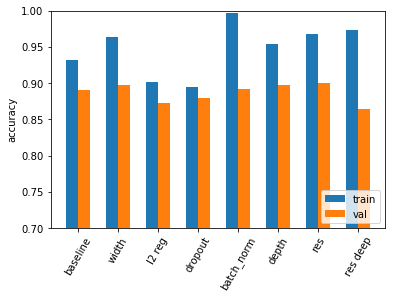

In [ ]:
trn_acc = [v["train"] for k, v in all_acc_dict.items()]
val_acc = [v["val"] for k, v in all_acc_dict.items()]

width = 0.3
plt.bar(np.arange(len(trn_acc)), trn_acc, width=width, label="train")
plt.bar(np.arange(len(val_acc)) + width, val_acc, width=width, label="val")
plt.xticks(np.arange(len(val_acc)) + width / 2, list(all_acc_dict.keys()), rotation=60)
plt.ylabel("accuracy")
plt.legend(loc="lower right")
plt.ylim(0.7, 1)
plt.savefig("accuracy_comparison.png", bbox_inches="tight")
plt.show()